# TASK 1

In [1]:
#import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 160)
import warnings
warnings.filterwarnings('ignore')

In [2]:
input_file = "sample-superstore_2023_T3.csv"
df = pd.read_csv(input_file, header = 0)
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7773,CA-2016-108196,25/11/2016,12/02/2016,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,43130,Est,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978
1,684,US-2017-168116,11/04/2017,11/04/2017,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,"""27217""",South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980,4,0.5,-3839.9904
2,9775,CA-2014-169019,26/07/2014,30/07/2014,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,78207,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,2177.584,8,0.8,-3701.8928
3,3012,CA-2017-134845,17/04/2017,24/04/2017,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,...,80027,West,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,2549.985,5,0.7,-3399.98
4,4992,US-2017-122714,12/07/2017,13/12/2017,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,...,60653,Central,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,1889.990,5,0.8,-2929.4845
5,3152,CA-2015-147830,15/12/2015,18/12/2015,First Class,NF-18385,Natalie Fritzler,Consumer,United States,Newark,...,43055,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,1799.994,Two,0.7,"""-2639.9912"""
6,5311,CA-2017-131254,19/11/2017,21/11/2017,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,...,77095,Central,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,1525.188,6,0.8,-2287.782
7,9640,CA-2015-116638,28/01/2015,NaN,Second Class,JH-15985,Joseph Holt,Consumer,United States,Concord,...,28027,South,FUR-TA-10000198,Frnture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,4297.644,Thirteen,0.4,NaN
8,1200,CA-2016-130946,04/08/2016,04/12/2016,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,...,77041,Central,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1088.792,4,0.8,-1850.9464
9,2698,CA-2014-145317,18/03/2014,23/03/2014,Standard Class,SM-20320,Sean Miller,Home Office,NaN,Jacksonville,...,32216,Southh,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferencing Unit,22638.480,6,0.5,-1811.0784


In [ ]:
len(df)

In [ ]:
print(df.columns)

## ER  Diagram

Relationships:

Customer to Order: One-to-Many. A customer can place multiple orders, but each order is placed by a single customer."Customer ID" should be a foreign key (FK) in the "Order" entity.

Order to Sales: One-to-Many. An order can include multiple products (sales), but each sale row is associated with one order.

Product to Sales: One-to-Many. A product can be part of multiple sales (orders), but each sale row references one specific product.

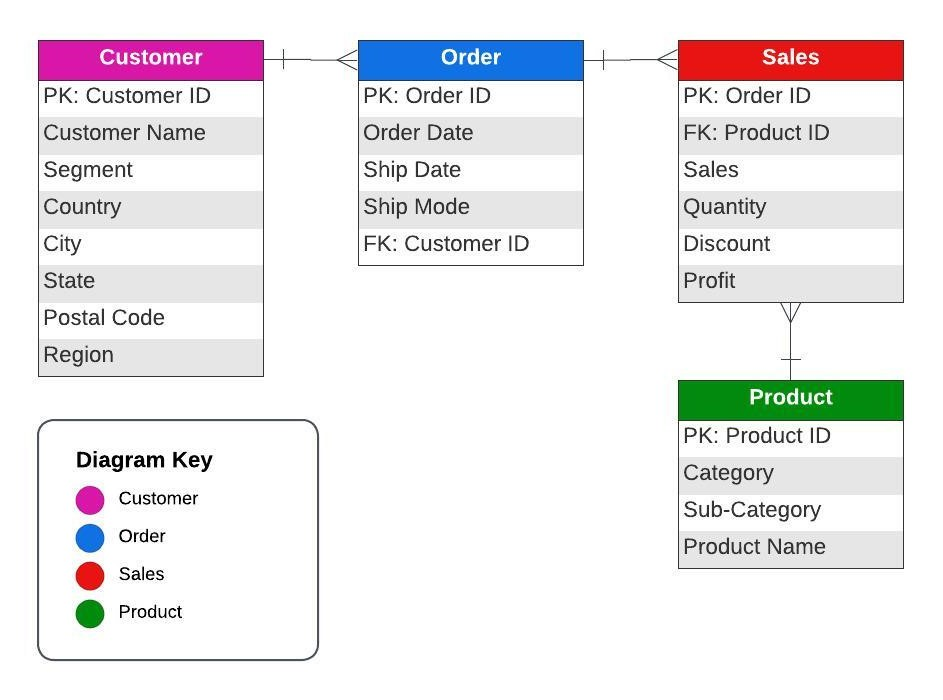

## Description of the Dataset

This dataset shows the transaction details from a retail operation, linking customers, orders, and products through sales records. It includes customer information (ID, name, segment, geographic details), order specifics (ID, date, shipping mode), product attributes (ID, category, sub-category, name), sales transactions (quantities, prices, discounts, and profits).

The dataset can be utilized for data analysis for customer behavior, forecasting sales, providing valuable insights for optimizing efficiency and market strategies. For example to compare how much items were purchased at discount prices, compared to regular prices, the profit generate, to investigate consumer preferences by region, preferred shopping times (specific dates/months), and identifies the most profitable products. 

# TASK 2

# Grouping of Data 

In [3]:
df_Product = df[['Row ID','Product ID', 'Category', 'Sub-Category', 'Product Name']]
df_Sales = df[['Row ID', 'Order ID', 'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
df_Customer = df[['Row ID','Customer ID', 'Customer Name', 'Segment','Country', 'City', 'State', 'Postal Code', 'Region']]
df_Order = df[['Row ID','Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID']]

# 1. df_Product group 

In [4]:
df_Product.head(10)

,Row ID,Product ID,Category,Sub-Category,Product Name
0,7773,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print
1,684,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print
2,9775,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System
3,3012,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer
4,4992,OFF-BI-10001120,Office Supplies,Binders,Ibico EPK-21 Electric Binding System
5,3152,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print
6,5311,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind
7,9640,FUR-TA-10000198,Frnture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tables & Bases
8,1200,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System
9,2698,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferencing Unit


## df_Product - Handling outliers and missing values

### df_Product Finding Outliers

In [5]:
#Find unique values in df_Product['SCategory'] 
unique_cat = df_Product['Category'] .unique()
print(unique_cat)

['Technology' 'Office Supplies' 'Frnture' 'Furniture' nan]


In [6]:
# Replace typos
df_Product['Category']  = df_Product['Category'] .replace({'Frnture': 'Furniture'})
unique_cat = df_Product['Category'] .unique()
print(unique_cat)

['Technology' 'Office Supplies' 'Furniture' nan]


In [7]:
#Find unique values in df_Product['Sub-Category'] 
unique_subcat = df_Product['Sub-Category'] .unique()
unique_subcat

array(['Machines', 'Binders', 'Tables', 'Bookcases', nan, 'Appliances',
       'Supplies', 'Chairs', 'Furnishings', 'Phones', 'Storage',
       'Accessories', 'Fasteners', 'Art', 'Envelopes', 'Labels', 'Paper',
       'Copiers'], dtype=object)

<span style="color: blue;"> No strange values. </span>

In [8]:
#Find unique values in df_Product['Product Name'] 
unique_prodname = df_Product['Product Name'] .unique()
len(unique_prodname)

1851

In [9]:
# Show data types of each column in df_Product
print(df_Product.dtypes)

Row ID           int64
Product ID      object
Category        object
Sub-Category    object
Product Name    object
dtype: object


In [10]:
#Check updated missing value in df_Product
df_Product_missing_values = df_Product.isnull().sum()
print(df_Product_missing_values)

Row ID          0
Product ID      2
Category        2
Sub-Category    4
Product Name    3
dtype: int64


### df_Product['Product ID '] missing values

To fill in missing 'Product ID' values with correspond 'Product Name' values in the dataset

In [11]:
#Compare with specified 'Product ID' and 'Product Name' in other rows
Product_missing_id= df_Product.loc[df_Product['Product ID'].isnull(), 'Product Name'].unique()
print(Product_missing_id)

['Laminate Occasional Tables' 'GBC ProClick Punch Binding System']


In [12]:
df_Product.sort_values(by=['Product Name'], inplace=True, ascending=False)
product_laminate = df_Product[df_Product['Product Name'] == 'Laminate Occasional Tables'][[
    'Product ID', 'Category','Sub-Category','Product Name']]
print(product_laminate)

           Product ID   Category Sub-Category                Product Name
206               NaN  Furniture       Tables  Laminate Occasional Tables
675   FUR-TA-10002774  Furniture       Tables  Laminate Occasional Tables
1063  FUR-TA-10002774  Furniture       Tables  Laminate Occasional Tables


In [13]:
#Fill in missing value in 'Product ID' with correspondence 'value with the same 'Product Name'

df_Product.loc[206, 'Product ID'] = 'FUR-TA-10002774'

In [14]:
df_Product.sort_values(by=['Product Name'], inplace=True, ascending=False)
product_laminate = df_Product[df_Product['Product Name'] == 'Laminate Occasional Tables'][[
    'Product ID', 'Category','Sub-Category','Product Name']]
print(product_laminate)

           Product ID   Category Sub-Category                Product Name
206   FUR-TA-10002774  Furniture       Tables  Laminate Occasional Tables
675   FUR-TA-10002774  Furniture       Tables  Laminate Occasional Tables
1063  FUR-TA-10002774  Furniture       Tables  Laminate Occasional Tables


In [15]:
df_Product.sort_values(by=['Product Name'], inplace=True, ascending=False)
product_gbc = df_Product[df_Product['Product Name'] == 'GBC ProClick Punch Binding System'][[
    'Product ID', 'Category','Product Name']]
print(product_gbc)

           Product ID         Category                       Product Name
9445  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
9621  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
9622  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
8570  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
377   OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
494               NaN  Office Supplies  GBC ProClick Punch Binding System
7854  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System


In [16]:
#Fill in missing value in 'Product ID' with correspondence 'value with the same 'Product Name'

df_Product.loc[494, 'Product ID'] = 'OFF-BI-10001071'

In [17]:
df_Product.sort_values(by=['Product Name'], inplace=True, ascending=False)
product_gbc = df_Product[df_Product['Product Name'] == 'GBC ProClick Punch Binding System'][[
    'Product ID', 'Category','Product Name']]
print(product_gbc)

           Product ID         Category                       Product Name
9445  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
9621  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
9622  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
8570  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
377   OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
494   OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System
7854  OFF-BI-10001071  Office Supplies  GBC ProClick Punch Binding System


### df_Product['Category', 'Sub-Category', 'Product Name'] outliers and missing values

To fill in missing 'Category', 'Sub-Category', 'Product Name' values with correspond 'Product ID' values in the dataset

In [18]:
Product_columns_to_update = ['Category', 'Sub-Category', 'Product Name']

for column in Product_columns_to_update:
    Product_ids_missing_values = df_Product.loc[df_Product[column].isnull(), 'Product ID'].unique()      
    for Product_id in Product_ids_missing_values:
        
        # Check if there's at least one not-null value for this Product ID in the current column
        if not df_Product[df_Product['Product ID'] == Product_id][column].dropna().empty:
            
            # Get the first not-null value 
            value_to_fill = df_Product.loc[df_Product['Product ID'] == Product_id, column].dropna().iloc[0]
            
            # Fill in missing values for Product ID in the current column
            df_Product.loc[df_Product['Product ID'] == Product_id, column] = value_to_fill

In [19]:
#Check updated missing value in df_Product
df_Product_missing_values = df_Product.isnull().sum()
print(df_Product_missing_values)

Row ID          0
Product ID      0
Category        0
Sub-Category    1
Product Name    0
dtype: int64


<span style="color: blue;"> Will investigate why it didn't work for one of  'Sub-Category' column. </span>

### df_Product['Sub-Category'] handling missing values
To fill in missing 'Category', 'Sub-Category', 'Product Name' values with correspond values in the dataset

In [22]:
#Compare with specified 'Product ID' and 'Sub-Category' in other rows
Product_missing_sub= df_Product.loc[df_Product['Sub-Category'].isnull(), 'Product ID'].unique()
print(Product_missing_sub)

['TEC-MA-10003337']


In [23]:
df_Product.sort_values(by=['Product ID'], inplace=True, ascending=False)
product_10003337 = df_Product[df_Product['Product ID'] == 'TEC-MA-10003337'][[
    'Product ID', 'Category','Sub-Category', 'Product Name']]
print(product_10003337)

          Product ID    Category Sub-Category          Product Name
124  TEC-MA-10003337  Technology          NaN  Okidata B401 Printer


<span style="color: blue;">It appears that there is only one data entry for the 'Product ID' TEC-MA-10003337.</span>

<span style="color: blue;">As a result, there are no additional records for this 'Product ID' to compare with.</span>

In [24]:
# Fill in the 'Sub-Categoty' manually

df_Product.loc[124, 'Sub-Category'] = 'Printers'

In [25]:
df_Product.sort_values(by=['Product ID'], inplace=True, ascending=False)
product_10003337 = df_Product[df_Product['Product ID'] == 'TEC-MA-10003337'][[
    'Product ID', 'Category','Sub-Category', 'Product Name']]
print(product_10003337)

          Product ID    Category Sub-Category          Product Name
124  TEC-MA-10003337  Technology     Printers  Okidata B401 Printer


In [26]:
#Check updated missing value in df_Product
df_Product_missing_values = df_Product.isnull().sum()
print(df_Product_missing_values)

Row ID          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
dtype: int64


<span style="color: blue;"> All columns within the 'df_Product' group dataset now have no missing values.</span>

# 2. df_Sales group - contains various numerical datas.

To calculate the profit we need to use the following formula: Profit = (Sales - (Cost Price * Quantity)) * (1 - Discount)

The provided data includes 'Sales,' 'Quantity,' 'Discount,' and 'Profit,' but it doesn't contain information about the cost price. 

In [27]:
df_Sales.sort_values(by=['Profit'], inplace=True, ascending=False)
df_Sales.head(10)

,Row ID,Order ID,Product ID,Sales,Quantity,Discount,Profit
9103,7100,CA-2015-124933,OFF-PA-10003302,212.64,6,0.0,99.9408
9102,4731,US-2015-103996,OFF-PA-10001736,212.64,6,0.0,99.9408
9101,6921,CA-2017-121706,OFF-AP-10003287,356.79,7,0.0,99.9012
9100,803,CA-2016-136133,OFF-AP-10000576,355.32,9,0.0,99.4896
9099,6709,CA-2015-123141,FUR-CH-10004287,883.84,4,0.2,99.432
9098,2660,CA-2015-135538,FUR-CH-10004287,883.84,4,0.2,99.432
9097,6711,CA-2016-149503,OFF-BI-10002133,273.92,8,0.2,99.296
9095,1621,CA-2017-108560,FUR-FU-10002937,198.46,2,0.0,99.23
9096,3748,CA-2017-161956,FUR-FU-10002937,198.46,2,0.0,99.23
9094,7705,CA-2016-114601,FUR-TA-10004147,447.84,4,0.0,98.5248


In [28]:
# Show data types of each column in df_Sales
print(df_Sales.dtypes)

Row ID          int64
Order ID       object
Product ID     object
Sales         float64
Quantity       object
Discount      float64
Profit         object
dtype: object


<span style="color: blue;">The columns 'Quantity' and 'Profit' in 'df_Sales' should be of numerical data types, rather than string.</span>

<span style="color: blue;">After addressing outliers and missing values, we will convert their types appropriately.</span>

## df_Sales - Handling Missing values

In [29]:
#Check updated missing value in df_Sales
df_Sales_missing_values = df_Sales.isnull().sum()
print(df_Sales_missing_values)

Row ID         0
Order ID       1
Product ID     2
Sales          1
Quantity       5
Discount       3
Profit        11
dtype: int64


<span style="color: blue;"> Because there are only small number of missing values, I will do imputation by comparing them with corresponding values, rather than using methods like filling with the mean or mode.</span>

In [30]:
#Compare with specified 'Product ID' and 'Sales' in other rows
Sales_missing_Sales= df_Sales.loc[df_Sales['Sales'].isnull(), 'Product ID'].unique()
print(Sales_missing_Sales)

['FUR-TA-10004442']


In [31]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10004442 = df_Sales[df_Sales['Product ID'] == 'FUR-TA-10004442'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10004442)

          Product ID   Sales Quantity  Discount    Profit
239  FUR-TA-10004442  401.59        2       0.3  -131.951
166  FUR-TA-10004442  344.22        2       0.4  -189.321
330  FUR-TA-10004442     NaN        1       0.4  -94.6605


<span style="color: blue;"> By dividing each value in row 166 by 2, we can fill in 172.11 value for 'Sales' in row 330</span>

In [32]:
df_Sales.loc[330, 'Sales'] = 172.11
df_Sales.loc[[239,166,330], ['Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]

,Product ID,Sales,Quantity,Discount,Profit
239,FUR-TA-10004442,401.59,2,0.3,-131.951
166,FUR-TA-10004442,344.22,2,0.4,-189.321
330,FUR-TA-10004442,172.11,1,0.4,-94.6605


### df_Sales['Quantity'] outliers and missing values

In [33]:
#Finad unique values in df_Sales['Quantity']
unique_quantity = df_Sales['Quantity'].unique()
print("\nUnique Quantity:", unique_quantity)


Unique Quantity: ['6' '5' '4' '3' '13' '7' '8' '9' '2' 'Seven' 'Thirteen' '10' '12' '11'
 '14' 'Two' nan '1' '7?' 'ten']


In [34]:
# Filter rows with NaN in the 'Quantity' column and display relevant columns
rows_with_nan_quantity = df_Sales[df_Sales['Quantity'].isna()][['Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(rows_with_nan_quantity)

          Product ID     Sales Quantity  Discount    Profit
28   OFF-BI-10000545  1369.764      NaN      0.70  -913.176
365  OFF-ST-10002574   331.536      NaN      0.20   -82.884
930  FUR-BO-10001337   308.499      NaN      0.15   -18.147
787  TEC-PH-10002890   108.576      NaN      0.40  -25.3344
712  FUR-FU-10001756    38.080      NaN      0.60   -29.512


In [35]:
#Compare with specified 'Product ID' and 'Quantity' in other rows
product_missing_qty = df_Sales.loc[df_Sales['Quantity'].isnull(), 'Product ID'].unique()
print(product_missing_qty)

['OFF-BI-10000545' 'OFF-ST-10002574' 'FUR-BO-10001337' 'TEC-PH-10002890'
 'FUR-FU-10001756']


In [36]:
#Comparing with correspondence Product ID with similar Sales

unique_qty_info = df_Sales[df_Sales['Product ID'].isin(product_missing_qty)][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']].drop_duplicates()
print(unique_qty_info)

           Product ID     Sales Quantity  Discount     Profit
9990  OFF-BI-10000545  9892.740       13      0.00    4946.37
18    OFF-BI-10000545  1598.058        7      0.70  -1065.372
27    OFF-BI-10000545  1369.764        6      0.70   -913.176
28    OFF-BI-10000545  1369.764      NaN      0.70   -913.176
9864  OFF-BI-10000545  1217.568        2      0.20    456.588
33    OFF-BI-10000545  1141.470        5      0.70    -760.98
1896  OFF-ST-10002574   828.840        6      0.00          0
17    OFF-BI-10000545   760.980        5      0.80   -1141.47
197   OFF-ST-10002574   663.072        6      0.20   -165.768
622   FUR-BO-10001337   616.998        6      0.15    -36.294
1875  OFF-ST-10002574   552.560        4      0.00          0
232   OFF-ST-10002574   552.560        5      0.20    -138.14
702   FUR-BO-10001337   514.165        5      0.15    -30.245
104   OFF-BI-10000545   456.588        2      0.70   -304.392
7823  FUR-BO-10001337   362.940        3      0.00     36.294
366   OF

####  Imputation with Corresponding Values

To fill in missing 'Quantity' values with correspond values in the dataset

In [37]:
df_Sales.loc[[27, 28, 366,365, 787, 4882,930,712], ['Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]

,Product ID,Sales,Quantity,Discount,Profit
27,OFF-BI-10000545,1369.764,6,0.70,-913.176
28,OFF-BI-10000545,1369.764,NaN,0.70,-913.176
366,OFF-ST-10002574,331.536,3,0.20,-82.884
365,OFF-ST-10002574,331.536,NaN,0.20,-82.884
787,TEC-PH-10002890,108.576,NaN,0.40,-25.3344
4882,TEC-PH-10002890,108.576,3,0.20,8.1432
930,FUR-BO-10001337,308.499,NaN,0.15,-18.147
712,FUR-FU-10001756,38.080,NaN,0.60,-29.512


In [38]:
#Replace value in 'Quantity'with correspondence 'Product ID' with similar 'Sales'

df_Sales.loc[28, 'Quantity'] = '6'
df_Sales.loc[365, 'Quantity'] = '3'
df_Sales.loc[787, 'Quantity'] = '3'
df_Sales.loc[930, 'Quantity'] = '3'
df_Sales.loc[712, 'Quantity'] = '4'
df_Sales.loc[[27, 28, 366,365, 787, 4882,930,712], ['Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]

,Product ID,Sales,Quantity,Discount,Profit
27,OFF-BI-10000545,1369.764,6,0.70,-913.176
28,OFF-BI-10000545,1369.764,6,0.70,-913.176
366,OFF-ST-10002574,331.536,3,0.20,-82.884
365,OFF-ST-10002574,331.536,3,0.20,-82.884
787,TEC-PH-10002890,108.576,3,0.40,-25.3344
4882,TEC-PH-10002890,108.576,3,0.20,8.1432
930,FUR-BO-10001337,308.499,3,0.15,-18.147
712,FUR-FU-10001756,38.080,4,0.60,-29.512


### df_Sales['Discount] outliers and missing values

In [39]:
#Finding Outliers in df_Sales['Discount']

unique_discount = df_Sales['Discount'].unique()
print("\nUnique Discount:", unique_discount)


Unique Discount: [0.5  0.   0.2  0.4  0.7  0.3  0.1  0.15 0.32 0.8  0.45 0.6   nan]


There is no outlier in df_Sales['Discount']. except nan

In [40]:
#Compare with specified 'Product ID' and 'Discount' in other rows
product_missing_discount = df_Sales.loc[df_Sales['Discount'].isnull(), 'Product ID'].unique()
print(product_missing_discount)

['OFF-ST-10000604' 'OFF-BI-10002026' 'OFF-LA-10002762']


In [41]:
#Comparing missing values in 'Discount' with other values in correspondence

unique_discount_info = df_Sales[df_Sales['Product ID'].isin(product_missing_discount)][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']].drop_duplicates()

print(unique_discount_info)

           Product ID    Sales Quantity  Discount    Profit
9437  OFF-BI-10002026  437.472       14       0.2  153.1152
6312  OFF-ST-10000604  250.272        9       0.2    15.642
9203  OFF-BI-10002026  234.360        6       0.0  112.4928
8835  OFF-BI-10002026  232.400        5       0.2    78.435
8331  OFF-ST-10000604  208.560        6       NaN     52.14
8573  OFF-BI-10002026  185.920        4       0.2    62.748
8897  OFF-BI-10002026  174.300        3       0.0    81.921
8088  OFF-ST-10000604  173.800        5       0.0     43.45
8807  OFF-LA-10002762  162.890       13       0.0   76.5583
8185  OFF-BI-10002026  139.440        3       0.2    47.061
184   OFF-BI-10002026  104.580        9       0.8  -172.557
375   OFF-BI-10002026  104.580        6       NaN   -80.178
7286  OFF-ST-10000604  104.280        3       0.0     26.07
7602  OFF-BI-10002026   92.960        2       0.2    31.374
8004  OFF-LA-10002762   87.710        7       0.0   41.2237
7781  OFF-LA-10002762   75.180        6 

In [42]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000604 = df_Sales[df_Sales['Product ID'] == 'OFF-ST-10000604'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000604)

           Product ID    Sales Quantity  Discount  Profit
6312  OFF-ST-10000604  250.272        9       0.2  15.642
8331  OFF-ST-10000604  208.560        6       NaN   52.14
8088  OFF-ST-10000604  173.800        5       0.0   43.45
7286  OFF-ST-10000604  104.280        3       0.0   26.07
7285  OFF-ST-10000604  104.280        3       0.0   26.07
6525  OFF-ST-10000604   69.520        2       0.0   17.38
6526  OFF-ST-10000604   69.520        2       0.0   17.38


In [43]:
'''By multiplying each column by 3 in row 6526, I identified that there is a 0.0 Discount in row 8331'''

df_Sales.loc[8331, 'Discount'] = '0.0'

####  Imputation with Corresponding Values

To fill in missing 'Discount' values using discount correspond to the unique 'Product ID' values in the dataset.

In [44]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10002026 = df_Sales[df_Sales['Product ID'] == 'OFF-BI-10002026'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10002026)

           Product ID    Sales Quantity Discount    Profit
9437  OFF-BI-10002026  437.472       14      0.2  153.1152
9203  OFF-BI-10002026  234.360        6      0.0  112.4928
8834  OFF-BI-10002026  232.400        5      0.2    78.435
8835  OFF-BI-10002026  232.400        5      0.2    78.435
8573  OFF-BI-10002026  185.920        4      0.2    62.748
8897  OFF-BI-10002026  174.300        3      0.0    81.921
8185  OFF-BI-10002026  139.440        3      0.2    47.061
184   OFF-BI-10002026  104.580        9      0.8  -172.557
375   OFF-BI-10002026  104.580        6      NaN   -80.178
7602  OFF-BI-10002026   92.960        2      0.2    31.374
6971  OFF-BI-10002026   62.496        2      0.2   21.8736
766   OFF-BI-10002026   34.860        2      0.7   -26.726
1091  OFF-BI-10002026   17.430        1      0.7   -13.363
795   OFF-BI-10002026   15.624        2      0.8  -24.9984


In [45]:
'''By multiplying each column by 6 in row 1091, I identified that there is a 0.7 Discount in row 375'''

df_Sales.loc[375, 'Discount'] = '0.7'

In [46]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10002762 = df_Sales[df_Sales['Product ID'] == 'OFF-LA-10002762'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10002762)

           Product ID   Sales Quantity Discount   Profit
8807  OFF-LA-10002762  162.89       13      0.0  76.5583
8004  OFF-LA-10002762   87.71        7      0.0  41.2237
8006  OFF-LA-10002762   87.71        7      0.0  41.2237
7780  OFF-LA-10002762   75.18        6      0.0  35.3346
7779  OFF-LA-10002762   75.18        6      NaN  35.3346
7781  OFF-LA-10002762   75.18        6      0.0  35.3346
7128  OFF-LA-10002762   50.12        4      0.0  23.5564
5724  OFF-LA-10002762   25.06        2      0.0  11.7782


In [47]:
#Replace value in 'Discount'with correspondence 'Product ID' with similar 'Sales' and 'Profit'

df_Sales.loc[7779, 'Discount'] = '0.0'

In [48]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10002762 = df_Sales[df_Sales['Product ID'] == 'OFF-LA-10002762'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10002762)

           Product ID   Sales Quantity Discount   Profit
8807  OFF-LA-10002762  162.89       13      0.0  76.5583
8004  OFF-LA-10002762   87.71        7      0.0  41.2237
8006  OFF-LA-10002762   87.71        7      0.0  41.2237
7780  OFF-LA-10002762   75.18        6      0.0  35.3346
7779  OFF-LA-10002762   75.18        6      0.0  35.3346
7781  OFF-LA-10002762   75.18        6      0.0  35.3346
7128  OFF-LA-10002762   50.12        4      0.0  23.5564
5724  OFF-LA-10002762   25.06        2      0.0  11.7782


### df_Sales['Profit] outliers and missing values

In [49]:
unique_discount = df_Sales['Profit'].unique()
unique_discount_list = unique_discount.tolist()
len(unique_discount_list)

7282

In [50]:
#Compare with specified 'Product ID' and 'Profit' in other rows
product_missing_profit = df_Sales.loc[df_Sales['Profit'].isnull(), 'Product ID'].unique()
print(product_missing_profit)

['FUR-TA-10000198' 'OFF-BI-10001359' 'FUR-BO-10003272' 'FUR-CH-10000309'
 'OFF-ST-10003716' 'FUR-BO-10002545' 'OFF-SU-10003505' 'TEC-PH-10000141'
 'FUR-FU-10000723' 'OFF-AP-10000358' 'OFF-BI-10003291']


In [51]:
#Comparing missing values in 'Profit' with other values in correspondence

unique_profit_info = df_Sales[df_Sales['Product ID'].isin(product_missing_profit)][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']].drop_duplicates()

#unique_profit_info.head(60)
len(unique_profit_info)

76

In [52]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000198 = df_Sales[df_Sales['Product ID'] == 'FUR-TA-10000198'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000198)

           Product ID     Sales  Quantity Discount      Profit
7     FUR-TA-10000198  4297.644  Thirteen      0.4         NaN
21    FUR-TA-10000198  2314.116         7      0.4  -1002.7836
9650  FUR-TA-10000198  1652.940         3      0.0    231.4116
315   FUR-TA-10000198  1322.352         3      0.2    -99.1764
228   FUR-TA-10000198   330.588         1      0.4   -143.2548


In [53]:
# Values in row #7 is 13 times of row #228

df_Sales.loc[7, 'Profit'] = '-1862.3124'

In [54]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000198 = df_Sales[df_Sales['Product ID'] == 'FUR-TA-10000198'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000198)

           Product ID     Sales  Quantity Discount      Profit
7     FUR-TA-10000198  4297.644  Thirteen      0.4  -1862.3124
21    FUR-TA-10000198  2314.116         7      0.4  -1002.7836
9650  FUR-TA-10000198  1652.940         3      0.0    231.4116
315   FUR-TA-10000198  1322.352         3      0.2    -99.1764
228   FUR-TA-10000198   330.588         1      0.4   -143.2548


In [55]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10001359 = df_Sales[df_Sales['Product ID'] == 'OFF-BI-10001359'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10001359)

           Product ID     Sales Quantity Discount      Profit
9971  OFF-BI-10001359  4305.552        6      0.2   1453.1238
9962  OFF-BI-10001359  2690.970        3      0.0   1264.7559
9923  OFF-BI-10001359  2152.776        3      0.2    726.5619
9943  OFF-BI-10001359  1793.980        2      0.0    843.1706
9942  OFF-BI-10001359  1793.980        2      0.0    843.1706
9944  OFF-BI-10001359  1793.980        2      0.0    843.1706
14    OFF-BI-10001359  1614.582        6      0.7         NaN
20    OFF-BI-10001359  1345.485        5      0.7  -1031.5385
11    OFF-BI-10001359   896.990        5      0.8  -1480.0335
9852  OFF-BI-10001359   896.990        1      0.0    421.5853
68    OFF-BI-10001359   538.194        2      0.7   -412.6154


In [56]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10001359 = df_Sales[df_Sales['Product ID'] == 'OFF-BI-10001359'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10001359)

           Product ID     Sales Quantity Discount      Profit
9971  OFF-BI-10001359  4305.552        6      0.2   1453.1238
9962  OFF-BI-10001359  2690.970        3      0.0   1264.7559
9923  OFF-BI-10001359  2152.776        3      0.2    726.5619
9943  OFF-BI-10001359  1793.980        2      0.0    843.1706
9942  OFF-BI-10001359  1793.980        2      0.0    843.1706
9944  OFF-BI-10001359  1793.980        2      0.0    843.1706
14    OFF-BI-10001359  1614.582        6      0.7         NaN
20    OFF-BI-10001359  1345.485        5      0.7  -1031.5385
9852  OFF-BI-10001359   896.990        1      0.0    421.5853
11    OFF-BI-10001359   896.990        5      0.8  -1480.0335
68    OFF-BI-10001359   538.194        2      0.7   -412.6154


In [57]:
# Values in row #14 is 6/5 times of row #20

df_Sales.loc[14, 'Profit'] = '-1237.8462'

In [58]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10001359 = df_Sales[df_Sales['Product ID'] == 'OFF-BI-10001359'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10001359)

           Product ID     Sales Quantity Discount      Profit
9971  OFF-BI-10001359  4305.552        6      0.2   1453.1238
9962  OFF-BI-10001359  2690.970        3      0.0   1264.7559
9923  OFF-BI-10001359  2152.776        3      0.2    726.5619
9943  OFF-BI-10001359  1793.980        2      0.0    843.1706
9942  OFF-BI-10001359  1793.980        2      0.0    843.1706
9944  OFF-BI-10001359  1793.980        2      0.0    843.1706
14    OFF-BI-10001359  1614.582        6      0.7  -1237.8462
20    OFF-BI-10001359  1345.485        5      0.7  -1031.5385
11    OFF-BI-10001359   896.990        5      0.8  -1480.0335
9852  OFF-BI-10001359   896.990        1      0.0    421.5853
68    OFF-BI-10001359   538.194        2      0.7   -412.6154


In [59]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003272 = df_Sales[df_Sales['Product ID'] == 'FUR-BO-10003272'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003272)

          Product ID      Sales Quantity Discount    Profit
62   FUR-BO-10003272  1352.3976        9     0.32       NaN
289  FUR-BO-10003272   883.9200        5      0.2   -110.49
572  FUR-BO-10003272   353.5680        2      0.2   -44.196
571  FUR-BO-10003272   353.5680        2      0.2   -44.196
322  FUR-BO-10003272   300.5328        2     0.32  -97.2312
846  FUR-BO-10003272   176.7840        1      0.2   -22.098


In [60]:
# Values in row #62 is 9/2 times of row #322

df_Sales.loc[62, 'Profit'] = '-437.5404'

In [61]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003272 = df_Sales[df_Sales['Product ID'] == 'FUR-BO-10003272'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003272)

          Product ID      Sales Quantity Discount     Profit
62   FUR-BO-10003272  1352.3976        9     0.32  -437.5404
289  FUR-BO-10003272   883.9200        5      0.2    -110.49
572  FUR-BO-10003272   353.5680        2      0.2    -44.196
571  FUR-BO-10003272   353.5680        2      0.2    -44.196
322  FUR-BO-10003272   300.5328        2     0.32   -97.2312
846  FUR-BO-10003272   176.7840        1      0.2    -22.098


In [62]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000309 = df_Sales[df_Sales['Product ID'] == 'FUR-CH-10000309'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000309)

           Product ID     Sales Quantity Discount    Profit
9853  FUR-CH-10000309  1690.040        4      0.0    422.51
8932  FUR-CH-10000309  1352.032        4      0.2    84.502
9768  FUR-CH-10000309  1267.530        3      0.0  316.8825
447   FUR-CH-10000309   887.271        3      0.3       NaN
448   FUR-CH-10000309   887.271        3      0.3  -63.3765


In [63]:
# Values in row #447 and row #448 are identical

df_Sales.loc[447, 'Profit'] = '-63.3765'

In [64]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000309 = df_Sales[df_Sales['Product ID'] == 'FUR-CH-10000309'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000309)

           Product ID     Sales Quantity Discount    Profit
9853  FUR-CH-10000309  1690.040        4      0.0    422.51
8932  FUR-CH-10000309  1352.032        4      0.2    84.502
9768  FUR-CH-10000309  1267.530        3      0.0  316.8825
447   FUR-CH-10000309   887.271        3      0.3  -63.3765
448   FUR-CH-10000309   887.271        3      0.3  -63.3765


In [65]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003716 = df_Sales[df_Sales['Product ID'] == 'OFF-ST-10003716'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003716)

           Product ID     Sales Quantity Discount    Profit
9579  OFF-ST-10003716  1575.140        7      0.0  204.7682
9512  OFF-ST-10003716  1350.120        6      0.0  175.5156
331   OFF-ST-10003716  1080.096        6      0.2  -94.5084
9232  OFF-ST-10003716   900.080        4      0.0  117.0104
9233  OFF-ST-10003716   900.080        4      0.0  117.0104
451   OFF-ST-10003716   720.064        4      0.2  -63.0056
450   OFF-ST-10003716   720.064        4      0.2  -63.0056
8973  OFF-ST-10003716   675.060        3      0.0   87.7578
540   OFF-ST-10003716   540.048        3      0.2  -47.2542
539   OFF-ST-10003716   540.048        3      0.2       NaN
8500  OFF-ST-10003716   450.040        2      0.0   58.5052
991   OFF-ST-10003716   180.016        1      0.2  -15.7514


In [66]:
# Values in row #540 and row #539 are identical

df_Sales.loc[539, 'Profit'] = '-47.2542'

In [67]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003716 = df_Sales[df_Sales['Product ID'] == 'OFF-ST-10003716'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003716)

           Product ID     Sales Quantity Discount    Profit
9579  OFF-ST-10003716  1575.140        7      0.0  204.7682
9512  OFF-ST-10003716  1350.120        6      0.0  175.5156
331   OFF-ST-10003716  1080.096        6      0.2  -94.5084
9232  OFF-ST-10003716   900.080        4      0.0  117.0104
9233  OFF-ST-10003716   900.080        4      0.0  117.0104
451   OFF-ST-10003716   720.064        4      0.2  -63.0056
450   OFF-ST-10003716   720.064        4      0.2  -63.0056
8973  OFF-ST-10003716   675.060        3      0.0   87.7578
540   OFF-ST-10003716   540.048        3      0.2  -47.2542
539   OFF-ST-10003716   540.048        3      0.2  -47.2542
8500  OFF-ST-10003716   450.040        2      0.0   58.5052
991   OFF-ST-10003716   180.016        1      0.2  -15.7514


In [68]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10002545 = df_Sales[df_Sales['Product ID'] == 'FUR-BO-10002545'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10002545)

           Product ID      Sales Quantity Discount     Profit
9844  FUR-BO-10002545  1565.8800        6      0.0   407.1288
9573  FUR-BO-10002545  1552.8310        7     0.15   200.9546
9702  FUR-BO-10002545  1043.9200        4      0.0   271.4192
511   FUR-BO-10002545   913.4300        5      0.3    -52.196
9576  FUR-BO-10002545   782.9400        3      0.0   203.5644
8180  FUR-BO-10002545   626.3520        3      0.2    46.9764
546   FUR-BO-10002545   532.3992        3     0.32        NaN
126   FUR-BO-10002545   521.9600        4      0.5  -250.5408


In [69]:
# Values in row #511 is approximately 5/3 of row #546

df_Sales.loc[546, 'Profit'] = '30.42'

In [70]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10002545 = df_Sales[df_Sales['Product ID'] == 'FUR-BO-10002545'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10002545)

           Product ID      Sales Quantity Discount     Profit
9844  FUR-BO-10002545  1565.8800        6      0.0   407.1288
9573  FUR-BO-10002545  1552.8310        7     0.15   200.9546
9702  FUR-BO-10002545  1043.9200        4      0.0   271.4192
511   FUR-BO-10002545   913.4300        5      0.3    -52.196
9576  FUR-BO-10002545   782.9400        3      0.0   203.5644
8180  FUR-BO-10002545   626.3520        3      0.2    46.9764
546   FUR-BO-10002545   532.3992        3     0.32      30.42
126   FUR-BO-10002545   521.9600        4      0.5  -250.5408


In [71]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003505 = df_Sales[df_Sales['Product ID'] == 'OFF-SU-10003505'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003505)

           Product ID    Sales Quantity Discount   Profit
7749  OFF-SU-10003505  695.160        6      0.0   34.758
7473  OFF-SU-10003505  579.300        5      0.0   28.965
6524  OFF-SU-10003505  347.580        3      0.0   17.379
5681  OFF-SU-10003505  231.720        2      0.0   11.586
5682  OFF-SU-10003505  231.720        2      0.0   11.586
647   OFF-SU-10003505  185.376        2      0.2  -34.758
648   OFF-SU-10003505  185.376        2      0.2  -34.758
649   OFF-SU-10003505  185.376        2      0.2      NaN


In [72]:
# Values in row #648 and row #649 are identical

df_Sales.loc[649, 'Profit'] = '-34.758'

In [73]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003505 = df_Sales[df_Sales['Product ID'] == 'OFF-SU-10003505'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003505)

           Product ID    Sales Quantity Discount   Profit
7749  OFF-SU-10003505  695.160        6      0.0   34.758
7473  OFF-SU-10003505  579.300        5      0.0   28.965
6524  OFF-SU-10003505  347.580        3      0.0   17.379
5681  OFF-SU-10003505  231.720        2      0.0   11.586
5682  OFF-SU-10003505  231.720        2      0.0   11.586
647   OFF-SU-10003505  185.376        2      0.2  -34.758
648   OFF-SU-10003505  185.376        2      0.2  -34.758
649   OFF-SU-10003505  185.376        2      0.2  -34.758


In [74]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000141 = df_Sales[df_Sales['Product ID'] == 'TEC-PH-10000141'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000141)

           Product ID    Sales Quantity Discount    Profit
6342  TEC-PH-10000141  211.168        4      0.2   15.8376
618   TEC-PH-10000141  158.376        4      0.4  -36.9544
753   TEC-PH-10000141  118.782        3      0.4       NaN


In [75]:
# Values in row #753 is 4/3 of row #753

df_Sales.loc[753, 'Profit'] = '-27.716'

In [76]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000141 = df_Sales[df_Sales['Product ID'] == 'TEC-PH-10000141'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000141)

           Product ID    Sales Quantity Discount    Profit
6342  TEC-PH-10000141  211.168        4      0.2   15.8376
618   TEC-PH-10000141  158.376        4      0.4  -36.9544
753   TEC-PH-10000141  118.782        3      0.4   -27.716


In [77]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000723 = df_Sales[df_Sales['Product ID'] == 'FUR-FU-10000723'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000723)

           Product ID    Sales Quantity Discount    Profit
7283  FUR-FU-10000723  289.240        7      0.0   26.0316
6165  FUR-FU-10000723  165.280        4      0.0   14.8752
929   FUR-FU-10000723  132.224        4      0.2  -18.1808
5601  FUR-FU-10000723  123.960        3      0.0   11.1564
5602  FUR-FU-10000723  123.960        3      0.0   11.1564
4701  FUR-FU-10000723   82.640        2      0.0    7.4376
1254  FUR-FU-10000723   66.112        2      0.2   -9.0904
360   FUR-FU-10000723   66.112        4      0.6       NaN
361   FUR-FU-10000723   66.112        4      0.6  -84.2928


In [78]:
# Values in row #360 and row #361 are identical

df_Sales.loc[360, 'Profit'] = '-84.2928'

In [79]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000723 = df_Sales[df_Sales['Product ID'] == 'FUR-FU-10000723'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000723)

           Product ID    Sales Quantity Discount    Profit
7283  FUR-FU-10000723  289.240        7      0.0   26.0316
6165  FUR-FU-10000723  165.280        4      0.0   14.8752
929   FUR-FU-10000723  132.224        4      0.2  -18.1808
5601  FUR-FU-10000723  123.960        3      0.0   11.1564
5602  FUR-FU-10000723  123.960        3      0.0   11.1564
4701  FUR-FU-10000723   82.640        2      0.0    7.4376
360   FUR-FU-10000723   66.112        4      0.6  -84.2928
361   FUR-FU-10000723   66.112        4      0.6  -84.2928
1254  FUR-FU-10000723   66.112        2      0.2   -9.0904


In [80]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000358 = df_Sales[df_Sales['Product ID'] == 'OFF-AP-10000358'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000358)

           Product ID   Sales Quantity Discount   Profit
7295  OFF-AP-10000358  90.860        7      0.0  26.3494
7294  OFF-AP-10000358  90.860        7      0.0  26.3494
7040  OFF-AP-10000358  77.880        6      0.0  22.5852
6671  OFF-AP-10000358  64.900        5      0.0   18.821
3245  OFF-AP-10000358  31.152        3      0.2   3.5046
4726  OFF-AP-10000358  25.960        2      0.0   7.5284
2744  OFF-AP-10000358  20.768        2      0.2   2.3364
501   OFF-AP-10000358  20.768        8      0.8      NaN
3381  OFF-AP-10000358  12.980        1      0.0   3.7642


In [81]:
# No correspondence values to be compared.

df_Sales.loc[501, 'Profit'] = '0'

In [82]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003291 = df_Sales[df_Sales['Product ID'] == 'OFF-BI-10003291'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003291)

           Product ID   Sales Quantity Discount    Profit
6067  OFF-BI-10003291  41.904        6      0.2   14.1426
6068  OFF-BI-10003291  41.904        6      0.2   14.1426
5235  OFF-BI-10003291  27.936        4      0.2    9.4284
5234  OFF-BI-10003291  27.936        4      0.2    9.4284
4608  OFF-BI-10003291  20.952        3      0.2    7.0713
4889  OFF-BI-10003291  17.460        2      0.0    8.2062
4888  OFF-BI-10003291  17.460        2      0.0    8.2062
884   OFF-BI-10003291  12.222        7      0.8       NaN
957   OFF-BI-10003291  10.476        6      0.8  -17.2854
1424  OFF-BI-10003291   7.857        3      0.7   -6.0237
2755  OFF-BI-10003291   6.984        1      0.2    2.3571
1557  OFF-BI-10003291   5.238        2      0.7   -4.0158


In [83]:
# Values in row #884 is 7/6 of row #957

df_Sales.loc[884, 'Profit'] = '-20.1663'

In [84]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10003291 = df_Sales[df_Sales['Product ID'] == 'OFF-BI-10003291'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10003291)

           Product ID   Sales Quantity Discount    Profit
6067  OFF-BI-10003291  41.904        6      0.2   14.1426
6068  OFF-BI-10003291  41.904        6      0.2   14.1426
5235  OFF-BI-10003291  27.936        4      0.2    9.4284
5234  OFF-BI-10003291  27.936        4      0.2    9.4284
4608  OFF-BI-10003291  20.952        3      0.2    7.0713
4889  OFF-BI-10003291  17.460        2      0.0    8.2062
4888  OFF-BI-10003291  17.460        2      0.0    8.2062
884   OFF-BI-10003291  12.222        7      0.8  -20.1663
957   OFF-BI-10003291  10.476        6      0.8  -17.2854
1424  OFF-BI-10003291   7.857        3      0.7   -6.0237
2755  OFF-BI-10003291   6.984        1      0.2    2.3571
1557  OFF-BI-10003291   5.238        2      0.7   -4.0158


In [85]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000418 = df_Sales[df_Sales['Product ID'] == 'TEC-MA-10000418'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000418)

           Product ID     Sales Quantity Discount        Profit
9807  TEC-MA-10000418  4799.984        2      0.2      359.9988
0     TEC-MA-10000418  4499.985        5      0.7     -6599.978
5     TEC-MA-10000418  1799.994      Two      0.7  "-2639.9912"


In [86]:
# Unify the value with remove the " "

df_Sales.loc[5, 'Profit'] = '-2639.9912'

In [87]:
df_Sales.sort_values(by=['Sales'], inplace=True, ascending=False)
product_10000418 = df_Sales[df_Sales['Product ID'] == 'TEC-MA-10000418'][[
    'Product ID', 'Sales', 'Quantity', 'Discount', 'Profit']]
print(product_10000418)

           Product ID     Sales Quantity Discount      Profit
9807  TEC-MA-10000418  4799.984        2      0.2    359.9988
0     TEC-MA-10000418  4499.985        5      0.7   -6599.978
5     TEC-MA-10000418  1799.994      Two      0.7  -2639.9912


In [88]:
print(df_Sales.dtypes)

Row ID          int64
Order ID       object
Product ID     object
Sales         float64
Quantity       object
Discount       object
Profit         object
dtype: object


#### Change data types of 'Quantity' and 'Profit' become NUMERICAL

#### df_Sales - Change data types 

In [89]:
df_Sales['Quantity'] = pd.to_numeric(df_Sales['Quantity'], errors='coerce').fillna(0).astype(int)
df_Sales['Discount'] = pd.to_numeric(df_Sales['Discount'], errors='coerce')
df_Sales['Profit'] = pd.to_numeric(df_Sales['Profit'], errors='coerce')
print(df_Sales.dtypes)

Row ID          int64
Order ID       object
Product ID     object
Sales         float64
Quantity        int32
Discount      float64
Profit        float64
dtype: object


In [90]:
#Check updated missing value in df_Sales
df_Sales_missing_values = df_Sales.isnull().sum()
print(df_Sales_missing_values)

Row ID        0
Order ID      1
Product ID    2
Sales         0
Quantity      0
Discount      0
Profit        0
dtype: int64


<span style="color: blue;"> Every column in the df_Sales dataset is now complete with no missing values, except for 'Order ID', which will be addressed during the processing of df_Order, and 'Product ID', which will be obtained from df_Product.</span>

## To Merge df_Product and df_Sales into df_Product_Sales

In [91]:
df_Product_Sales = pd.merge(df_Product[['Row ID','Product ID', 'Category', 'Sub-Category', 'Product Name']], 
                df_Sales[['Row ID', 'Order ID', 'Sales', 'Quantity', 'Discount', 'Profit']], on='Row ID', how='inner')

In [92]:
#Check updated missing value in df_Sales
df_Product_Sales_missing_values = df_Product_Sales.isnull().sum()
print(df_Product_Sales_missing_values)

Row ID          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Order ID        1
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


## df_Product_Sales - Descriptive Statistic

In [93]:
descriptive_stats = df_Product_Sales.describe()
print(descriptive_stats)

            Row ID         Sales     Quantity     Discount       Profit
count  9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   4997.500000    229.858001     3.785471     0.156203    28.669940
std    2885.163629    623.245101     2.223391     0.206452   234.257639
min       1.000000      0.444000     0.000000     0.000000 -6599.978000
25%    2499.250000     17.280000     2.000000     0.000000     1.731375
50%    4997.500000     54.490000     3.000000     0.200000     8.671250
75%    7495.750000    209.940000     5.000000     0.200000    29.364000
max    9994.000000  22638.480000    14.000000     0.800000  8399.976000


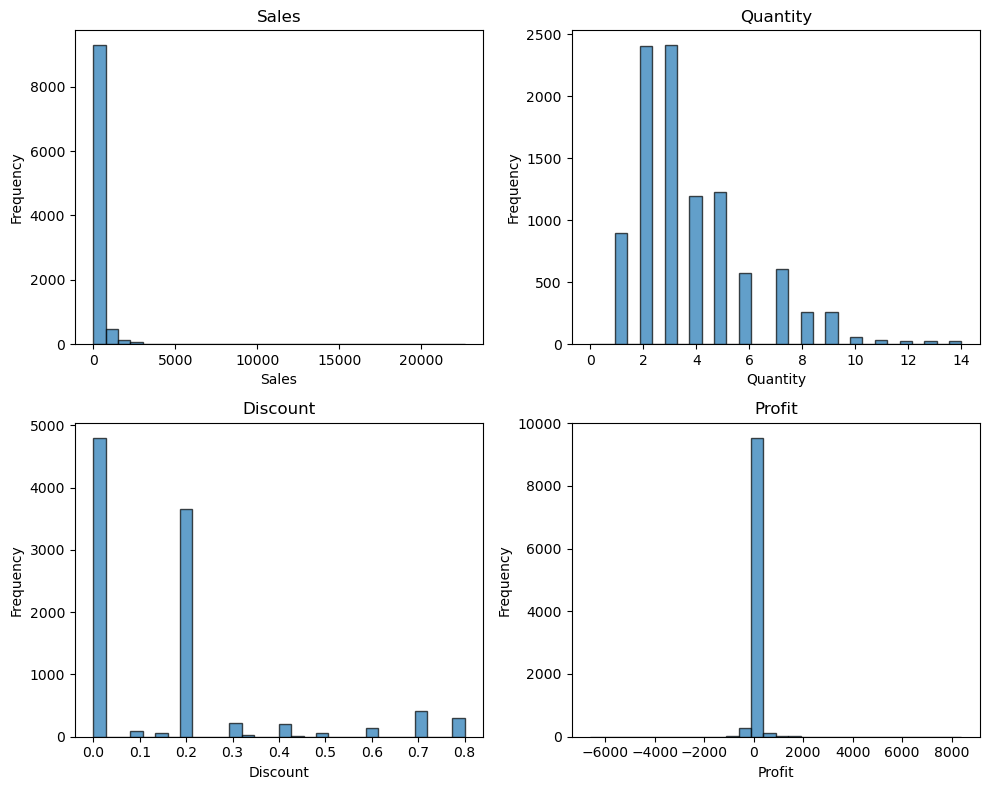

In [94]:
columns_to_plot = ['Sales', 'Quantity', 'Discount', 'Profit']

plt.figure(figsize=(10, 8))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 2, i)
    plt.hist(df_Product_Sales[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

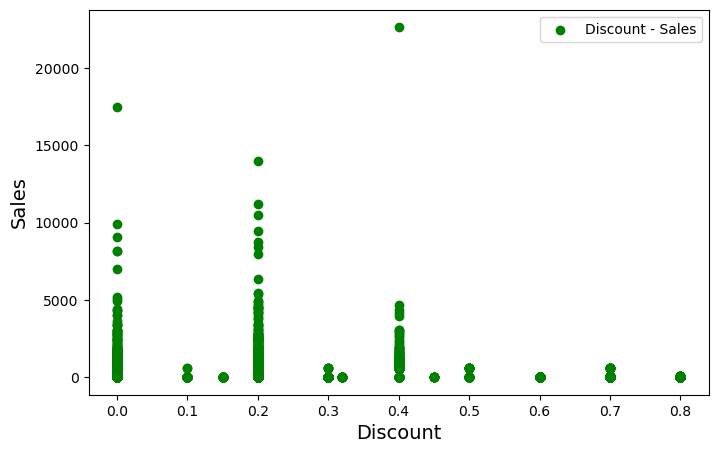

In [95]:
# plot the three dataframes for Discount and Sales columns in df_Sales

plt.rcParams["figure.figsize"] = [8,5]
plt.scatter(df_Product_Sales['Discount'], df_Sales['Sales'], color='green',label='Discount - Sales')
plt.title("", size=14)
plt.xlabel("Discount", size=14)
plt.ylabel("Sales", size=14)
plt.legend()
#plt.savefig("",transparent=False, bbox_inches='tight',pad_inches=0.1)

# 3. df_Customer group

In [96]:
df_Customer.head(10)

,Row ID,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region
0,7773,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130,Est
1,684,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,"""27217""",South
2,9775,LF-17185,Luke Foster,Consumer,United States,San Antonio,Texas,78207,Central
3,3012,SR-20425,Sharelle Roach,Home Office,United States,Louisville,Colorado,80027,West
4,4992,HG-14965,Henry Goldwyn,Corporate,United States,Chicago,Illinois,60653,Central
5,3152,NF-18385,Natalie Fritzler,Consumer,United States,Newark,Ohio,43055,East
6,5311,NC-18415,Nathan Cano,Consumer,United States,Houston,Texas,77095,Central
7,9640,JH-15985,Joseph Holt,Consumer,United States,Concord,North Carolina,28027,South
8,1200,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,Texas,77041,Central
9,2698,SM-20320,Sean Miller,Home Office,NaN,Jacksonville,Florida,32216,Southh


In [97]:
# Show data types of each column in df_Customer
print(df_Customer.dtypes)

Row ID            int64
Customer ID      object
Customer Name    object
Segment          object
Country          object
City             object
State            object
Postal Code      object
Region           object
dtype: object


## df_Customer Handling Outliers

In [98]:
#Finding Outliers in df_Customer['Region']

unique_region = df_Customer['Region'].unique()
print(unique_region)

['Est' 'South' 'Central' 'West' 'East' 'Southh' 'Centrl' nan 'Cntral']


In [102]:
# Replace 'Centrl' and 'Cntral' with 'Central' in the 'Region' column
df_Customer['Region'] = df_Customer['Region'].replace({'Centrl': 'Central', 'Cntral': 'Central', 'Southh': 'South'})

unique_region = df_Customer['Region'].unique()
print(unique_region)

['Est' 'South' 'Central' 'West' 'East' nan]


In [103]:
#Finding Outliers in df_Customer['Customer Name']

unique_custname = df_Customer['Customer Name'].unique()
len(unique_custname)

795

In [104]:
#Finding Outliers in df_Customer['Segment']

unique_segment = df_Customer['Segment'].unique()
print(unique_segment)

['Consumer' 'Corporate' 'Home Office' '%' nan]


In [108]:
df_Customer.sort_values(by=['Segment'], inplace=True, ascending=False)
segment1 = df_Customer[df_Customer['Segment'] == '%'][[
    'Customer ID', 'Customer Name', 'Segment','Country', 'City']]
print(segment1)

   Customer ID Customer Name Segment        Country          City
43    SB-20290  Sean Braxton       %  United States  Philadelphia


<span style="color: blue;"> Will compare the Segment value of the same Customer ID in other orders</span>

In [109]:
df_Customer.sort_values(by=['Customer ID'], inplace=True, ascending=False)
cust_20290 = df_Customer[df_Customer['Customer ID'] == 'SB-20290'][[
    'Customer ID', 'Customer Name', 'Segment','Country', 'City']]
print(cust_20290)

     Customer ID Customer Name    Segment        Country          City
1030    SB-20290  Sean Braxton  Corporate  United States  Philadelphia
43      SB-20290  Sean Braxton          %  United States  Philadelphia
6142    SB-20290  Sean Braxton  Corporate  United States      Florence
6482    SB-20290  Sean Braxton  Corporate  United States          Kent
123     SB-20290  Sean Braxton  Corporate  United States       Houston
8852    SB-20290  Sean Braxton  Corporate  United States     San Diego
49      SB-20290  Sean Braxton  Corporate  United States       Houston
6178    SB-20290  Sean Braxton  Corporate  United States     Henderson
1333    SB-20290  Sean Braxton  Corporate  United States   Springfield
6957    SB-20290  Sean Braxton  Corporate  United States     Henderson
26      SB-20290  Sean Braxton  Corporate  United States   Springfield
4952    SB-20290  Sean Braxton  Corporate  United States  Philadelphia
5128    SB-20290  Sean Braxton  Corporate  United States   Springfield
5246  

In [114]:
df_Customer.loc[43, 'Segment'] = 'Corporate'

In [115]:
#Finding Outliers in df_Customer['Country']

unique_country = df_Customer['Country'].unique()
print(unique_country)

['United States' 'US' nan '56']


In [117]:
df_Customer.sort_values(by=['Country'], inplace=True, ascending=False)
country56 = df_Customer[df_Customer['Country'] == '56'][[
    'Customer ID', 'Customer Name', 'Segment','Country', 'City', 'State']]
print(country56)

   Customer ID   Customer Name   Segment Country       City      State
27    BG-11035  Barry Gonzalez  Consumer      56  Nashville  Tennessee


In [118]:
df_Customer.loc[27, 'Country'] = 'United States'

In [123]:
# Replace 'US' with 'United States' in the 'Country' column
df_Customer['Country'] = df_Customer['Country'].replace({'US': 'United States'})
unique_country = df_Customer['Country'].unique()
print(unique_country)

['United States' nan]


In [124]:
#Finding Outliers in df_Customer['City']

unique_city = df_Customer['City'].unique()
len(unique_city)

532

In [125]:
#Finding Outliers in df_Customer['State']

unique_state = df_Customer['State'].unique()
print(unique_state)

['Florida' 'Delaware' 'Montana' 'Wisconsin' 'Utah' 'Arizona' 'California'
 'Virginia' 'New York' 'Michigan' 'Texas' 'Pennsylvania' 'South Dakota'
 'Georgia' 'New Jersey' 'Illinois' 'Maryland' 'Oregon' 'North Carolina'
 'Rhode Island' 'Ohio' 'Colorado' 'New Hampshire' 'Arkansas' 'Tennessee'
 'Minnesota' 'Washington' 'Massachusetts' 'Oklahoma' 'Alabama'
 'Mississippi' 'Missouri' 'Connecticut' 'West Virginia' 'South Carolina'
 'Kansas' 'Indiana' 'New Mexico' 'Kentucky' 'Iowa' 'Nebraska' 'Louisiana'
 'Idaho' 'Nevada' 'District of Columbia' nan 'North Dakota' 'Vermont'
 'Maine' 'Wyoming']


In [126]:
#Finding Outliers in df_Customer['Postal Code']

unique_postcode = df_Customer['Postal Code'].unique()
len(unique_postcode)

634

### df_Customer Handling Missing Values

In [127]:
df_Customer_missing_values = df_Customer.isnull().sum()
print(df_Customer_missing_values)

Row ID           0
Customer ID      0
Customer Name    3
Segment          3
Country          4
City             2
State            4
Postal Code      3
Region           3
dtype: int64


###  "Imputation with Corresponding Values" for missing values in "Customer Name" column.

To fill in missing 'Customer Name' values using names linked to the unique 'Customer ID' values in the dataset.

In [128]:
#Compare with specified 'Customer ID' and 'Customer Name' in other rows
customer_ids_missing_name = df_Customer.loc[df_Customer['Customer Name'].isnull(), 'Customer ID'].unique()
print(customer_ids_missing_name)

['BP-11095' 'DH-13075' 'SO-20335']


In [129]:
unique_customer_info = df_Customer[df_Customer['Customer ID'].isin(customer_ids_missing_name)][[
    'Customer ID','Customer Name']].drop_duplicates()
print(unique_customer_info)

     Customer ID   Customer Name
5753    DH-13075   Dave Hallsten
9318    BP-11095    Bart Pistole
877     BP-11095             NaN
869     DH-13075             NaN
5648    SO-20335  Sean O'Donnell
76      SO-20335             NaN


In [130]:
# Replace NaN values in 'Customer Name' with "Customer Name" values in corresponding Customer ID"

for index, row in unique_customer_info.iterrows():
    customer_id = row['Customer ID']
    customer_name = df_Customer.loc[df_Customer['Customer ID'] == customer_id, 'Customer Name'].dropna().iloc[0]
    df_Customer.loc[df_Customer['Customer ID'] == customer_id, 'Customer Name'] = customer_name
    
specific_customer_name_info = df_Customer[df_Customer['Customer ID'].isin(['SO-20335', 'DH-13075', 'BP-11095'])][[
    'Customer ID', 'Customer Name']].drop_duplicates()
print(specific_customer_name_info)

     Customer ID   Customer Name
5753    DH-13075   Dave Hallsten
9318    BP-11095    Bart Pistole
5648    SO-20335  Sean O'Donnell


### To fill in missing 'Segment' values linked to the unique 'Customer ID' values in the dataset.

In [131]:
#Compare with specified 'Customer ID' and 'Segment' in other rows
customer_ids_missing_segment = df_Customer.loc[df_Customer['Segment'].isnull(), 'Customer ID'].unique()
print(customer_ids_missing_segment)

['EP-13915' 'TC-21475' 'TG-21310']


In [132]:
unique_segment_info = df_Customer[df_Customer['Customer ID'].isin(customer_ids_missing_segment)][[
    'Customer ID','Segment']].drop_duplicates()
print(unique_segment_info)

     Customer ID      Segment
4095    EP-13915     Consumer
206     EP-13915          NaN
8255    TG-21310     Consumer
9306    TC-21475  Home Office
494     TC-21475          NaN
443     TG-21310          NaN


In [133]:
# Replace NaN values in 'Segment' with "Segment" values in corresponding Customer ID" 

for index, row in unique_segment_info.iterrows():
    customer_id = row['Customer ID']
    segment = df_Customer.loc[df_Customer['Customer ID'] == customer_id, 'Segment'].dropna().iloc[0]
    df_Customer.loc[df_Customer['Customer ID'] == customer_id, 'Segment'] = segment
    
specific_segment_info = df_Customer[df_Customer['Customer ID'].isin(['EP-13915', 'TG-21310', 'TC-21475'])][[
    'Customer ID', 'Segment']]

specific_segment_info = df_Customer.loc[[142, 163, 206, 414, 443, 494], ['Customer ID', 'Segment']]
print(specific_segment_info)

    Customer ID      Segment
142    EP-13915     Consumer
163    TG-21310     Consumer
206    EP-13915     Consumer
414    TC-21475  Home Office
443    TG-21310     Consumer
494    TC-21475  Home Office


### Imputation with Corresponding Values in 'Customer ID' for other missing values in Customer Group 

In [134]:
Customer_columns_to_update = ['Country', 'City', 'State', 'Postal Code', 'Region']

for column in Customer_columns_to_update:
    customer_ids_missing_values = df_Customer.loc[df_Customer[column].isnull(), 'Customer ID'].unique()      
    for customer_id in customer_ids_missing_values:
        
        # Check if there's at least one not-null value for this Customer ID in the current column
        if not df_Customer[df_Customer['Customer ID'] == customer_id][column].dropna().empty:
            
            # Get the first not-null value 
            value_to_fill = df_Customer.loc[df_Customer['Customer ID'] == customer_id, column].dropna().iloc[0]
            
            # Fill in missing values for Customer ID in the current column
            df_Customer.loc[df_Customer['Customer ID'] == customer_id, column] = value_to_fill

In [135]:
#Check updated missing value in df_Customer
df_Customer_missing_values = df_Customer.isnull().sum()
print(df_Customer_missing_values)

Row ID           0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
dtype: int64


# 4. df_Order group

In [ ]:
df_Order.head(60)

In [ ]:
# Show data types of each column in df_Order
print(df_Order.dtypes)

## df_Order handling missing value

In [ ]:
#Check updated missing value in df_Order
df_Order_missing_values = df_Order.isnull().sum()
print(df_Order_missing_values)

In [ ]:
# Show all rows where any  specified columns have missing values
missing_values_filter = df_Order['Order ID'].isnull() | \
                        df_Order['Order Date'].isnull() | \
                        df_Order['Ship Date'].isnull() | \
                        df_Order['Ship Mode'].isnull()

# get rows with missing values in the columns
df_Order_with_missing_values = df_Order[missing_values_filter]
print(df_Order_with_missing_values[['Order ID','Order Date','Ship Date','Ship Mode']])

### df_Order['Ship Mode] - Handling missing values

<span style="color: blue;">To find the most frequently used Ship Mode by the customer with ID KT-16480</span>

In [ ]:
#Show all columns in df_Order for each unique Ship Mode, drop duplicates
columns2_to_check = ['Ship Mode']

for column in columns2_to_check:
    unique_values = df_Order[column].unique().tolist()
    print(f"\nUnique {column}:", unique_values)

In [ ]:
df_Order.loc[244, 'Ship Mode'] = 'Second Class'

In [ ]:
df_Order.loc[150, 'Ship Mode'] = 'Second Class'
df_Order.loc[870, 'Ship Mode'] = 'Second Class'
df_Order.loc[1030, 'Ship Mode'] = 'Standard Class'

### df_Order['Ship Date] - Handling missing values

In [ ]:
df_Order.loc[7, 'Ship Date'] = '01/02/2015'
df_Order.loc[13, 'Ship Date'] = '25/10/2017'
df_Order.loc[211, 'Ship Date'] = '19/08/2016'

### df_Order['Order ID] - Handling missing values

<span style="color: blue;"> Seems values in 'Order ID' is related to Country and year of order date</span>

In [ ]:
df.loc[202, 'Country']

In [ ]:
#filtered_rows = df_Order[df_Order['Order Date'].str.contains('27/11/2015', na=False)]
filtered_rows = df[df['Order Date'].str.contains('27/11/2015', na=False)]
print(filtered_rows[['Order ID','Order Date','Ship Date', 'Ship Mode', 'Customer ID']])

In [ ]:
#Check if 'US-2015-168934' Order ID is exist

filtered_rows2 = df[df['Order ID'].str.contains('US-2015-168934', na=False)]
print(filtered_rows2[['Order ID','Order Date', 'Ship Mode', 'Customer ID']])

In [ ]:
#Since 'US-2015-168934' Order ID doesn't exist, we can fill in the missing value in Order ID with this value

df_Order.loc[202, 'Order ID'] = 'US-2015-168934'

### df_Order['Order Date] - Handling outliers and missing values

In [ ]:
df_Order.sort_values(by=['Ship Mode'], inplace=True, ascending=False)
order_130512 = df_Order[df_Order['Order ID'] == 'US-2015-130512'][['Order ID', 'Order Date', 'Ship Date','Ship Mode']]
print(order_130512)

In [ ]:
df_Order.sort_values(by=['Ship Mode'], inplace=True, ascending=False)
order_155887 = df_Order[df_Order['Order ID'] == 'CA-2014-155887'][['Order ID', 'Order Date', 'Ship Date','Ship Mode', 'Customer ID']]
print(order_155887)

<span style="color: blue;"> will look into the shipping mode preferences of this particular customer.</span>

In [ ]:
df_Order.sort_values(by=['Order ID'], inplace=True, ascending=False)
order_KT16480 = df_Order[df_Order['Customer ID'] == 'KT-16480'][['Order ID', 'Order Date', 'Ship Date','Ship Mode', 'Customer ID']]
print(order_KT16480)

In [ ]:
order_KT16480['Ship Mode'].value_counts().idxmax()

In [ ]:
df_Order.loc[197, 'Order Date'] = '18/08/2015'
df_Order.loc[244, 'Order Date'] = '13/05/2014'

In [ ]:
#Check updated missing value in df_Order
df_Order_missing_values = df_Order.isnull().sum()
print(df_Order_missing_values)

### df_Order['Order Date] - Handling Error (Swapped Date with Month)

<span style="color: blue;"> Detected format inconsistency in the 'Ship Date' column, as the 'Ship Date' should logically follow the 'Order Date' in the DD/MM/YYYY format. </span>

In [ ]:
# Split 'Order Date' into three separate columns
df_Order[['OrderDD', 'OrderMM', 'OrderYYYY']] = df_Order['Order Date'].str.split('/', expand=True)

In [ ]:
unique_country = df_Customer['Country'].unique()
unique_country = unique_country.tolist()
print("\nUnique Country:", unique_country)

In [ ]:
unique_city = df_Customer['City'].unique()
unique_city = unique_city.tolist()
#print("\nUnique city:", unique_city)

Correlation between: 
1. City and Specific Product, Specific Segment and Product.

2. Discount and Profit.

3. Customer ID and Profit.

## Finding the Outliers

In [ ]:
#Change 'Quantity' and 'Profit' value type from string to numerical data type

df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

In [ ]:
#For numrical data, Fill NaN values with mean

mean_sales = df['Sales'].mean()
mean_quantity = df['Quantity'].mean()
mean_discount = df['Discount'].mean()
mean_profit = df['Profit'].mean()

df['Sales'].fillna(mean_sales, inplace=True)
df['Quantity'].fillna(mean_quantity, inplace=True)
df['Discount'].fillna(mean_discount, inplace=True)
df['Profit'].fillna(mean_profit, inplace=True)

In [ ]:
#Round 'Sales', 'Discount', and 'Profit' decimal places

df['Sales'] = df['Sales'].round(1)
df['Quantity'] = df['Quantity'].round(1)
df['Discount'] = df['Discount'].round(2)
df['Profit'] = df['Profit'].round(0)

In [ ]:
df[['Country','City','Customer ID','Product Name','Sales','Quantity','Discount','Profit']].head(10)

In [ ]:
unique_countries = df_Customer['Country'].unique()
print("Unique Countries:", unique_countries)

In [ ]:
unique_cities = df['City'].unique()
#print("\nUnique Cities:", unique_cities)

In [ ]:
# Filter rows where 'Order ID' is 'US-2017-122714'
order_id_row = df[df['Order ID'] == 'US-2017-122714']

# Display the filtered row
print(order_id_row[['Country','City','Product Name','Sales','Quantity','Discount','Profit']])


In [ ]:
# Identify and treat outliers in 'Sales' and 'Profit'
# Example: Use z-score to identify and remove outliers
from scipy.stats import zscore
z_scores = zscore(df[['Sales', 'Profit']])
df_no_outliers = df[(z_scores < 3).all(axis=1)]

In [ ]:
# Identify outliers in 'Sales' and 'Profit'
# Apply treatment method, e.g., removing or transforming outliers

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical variables for normalization and scaling
numerical_vars = ['Sales', 'Quantity', 'Discount', 'Profit']

# Apply Min-Max scaling
scaler = MinMaxScaler()
df[numerical_vars] = scaler.fit_transform(df[numerical_vars])

In [ ]:
# Demonstrate data aggregations or frequency distributions
# Example: Group by 'Category' and calculate the mean of 'Sales' and 'Profit'
group_data = df.groupby('Category')['Sales', 'Profit'].mean()
print(group_data)

In [ ]:
# Identify and handle missing values
missing_values = df.isnull().sum()
# Example: Fill missing values in 'Sales' with the mean
df['Sales'].fillna(df['Sales'].mean(), inplace=True)

In [ ]:
# Describe features that are related and the nature of that relationship
correlation_matrix = df_Sales.corr()
print(correlation_matrix)